In [1]:
import os

In [2]:
imdb_dir='/home/tangli/Documents/deeplearningbook/deeplearningwithpython/data/aclImdb'

In [3]:
train_dir = os.path.join(imdb_dir, 'train')

In [4]:
labels=[]
texts=[]

In [5]:
for label_type in ['neg','pos']:
    dir_name = os.path.join(train_dir,label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:]== '.txt':
            f=open(os.path.join(dir_name,fname))
            texts.append(f.read())
            f.close
            if label_type =='neg':
                labels.append(0)
            else:
                labels.append(1)

In [6]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [7]:
from keras.preprocessing.sequence import pad_sequences

In [8]:
import numpy as np

In [9]:
maxlen = 100
traing_samples = 200
validation_samples = 10000
max_words =10000

In [10]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [11]:
tokenizer

In [12]:
word_index = tokenizer.word_index

In [13]:
print('%s unique token.'%len(word_index))

88582 unique token.


In [14]:
data = pad_sequences(sequences,maxlen=maxlen)

In [37]:
len(data)

25000

In [38]:
word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'he': 26,
 'be': 27,
 'one': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'who': 34,
 'so': 35,
 'from': 36,
 'like': 37,
 'her': 38,
 'or': 39,
 'just': 40,
 'about': 41,
 "it's": 42,
 'out': 43,
 'if': 44,
 'has': 45,
 'some': 46,
 'there': 47,
 'what': 48,
 'good': 49,
 'more': 50,
 'when': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'she': 56,
 'even': 57,
 'my': 58,
 'would': 59,
 'which': 60,
 'only': 61,
 'story': 62,
 'really': 63,
 'see': 64,
 'their': 65,
 'had': 66,
 'can': 67,
 'were': 68,
 'me': 69,
 'well': 70,
 'than': 71,
 'we': 72,
 'much': 73,
 'been': 74,
 'bad': 75,
 'get': 76,
 'will': 77,
 'do': 78,
 'also': 79,
 'into': 80,
 'people': 81,
 'other': 82,
 '

In [16]:
data.view

<function ndarray.view>

In [17]:
labels = np.asarray(labels)

In [18]:
data.shape

(25000, 100)

In [19]:
labels.shape

(25000,)

In [20]:
indices = np.arange(data.shape[0])

In [21]:
np.random.shuffle(indices)

In [22]:
indices

array([16105, 12325, 11634, ..., 20680,  3576, 15440])

In [23]:
data = data[indices]

In [24]:
labels = labels[indices]

In [48]:
x_train = data[:traing_samples]
y_train = labels[:traing_samples]
x_val = data[traing_samples:traing_samples+validation_samples]
y_val = labels[traing_samples:traing_samples+validation_samples]

In [26]:
glove_dir = '/home/tangli/Documents/deeplearningbook/deeplearningwithpython/glove.6B'

In [27]:
embedding_index = {}

In [28]:
f = open(os.path.join(glove_dir,'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embedding_index[word]=coefs
f.close()

In [29]:
len(embedding_index)

400000

In [30]:
embedding_dim=100
embedding_matrix = np.zeros((max_words,embedding_dim))

In [31]:
for word,i in word_index.items():
    if i<max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i]=embedding_vector

In [32]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten,Dense

In [39]:
model = Sequential()
model.add(Embedding(max_words,embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable= False

In [41]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [49]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 2s 9ms/step - loss: 1.7283 - acc: 0.4900 - val_loss: 0.7219 - val_acc: 0.4986
Epoch 2/10
200/200 [==============================] - 0s 1ms/step - loss: 0.5201 - acc: 0.6950 - val_loss: 0.8461 - val_acc: 0.4981
Epoch 3/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4762 - acc: 0.7650 - val_loss: 0.9872 - val_acc: 0.4990
Epoch 4/10
200/200 [==============================] - 0s 1ms/step - loss: 0.3607 - acc: 0.8350 - val_loss: 1.4601 - val_acc: 0.5023
Epoch 5/10
200/200 [==============================] - 0s 1ms/step - loss: 0.2943 - acc: 0.8950 - val_loss: 0.8186 - val_acc: 0.5267
Epoch 6/10
200/200 [==============================] - 0s 1ms/step - loss: 0.3441 - acc: 0.7950 - val_loss: 1.1617 - val_acc: 0.4985
Epoch 7/10
200/200 [==============================] - 0s 1ms/step - loss: 0.2774 - acc: 0.8600 - val_loss: 0.7172 - val_acc: 0.5685
Epoch 8/10
200/200 [========

In [43]:
x_train.shape

(200, 100)

In [44]:
y_train.shape

(200,)

In [45]:
x_val.shape

(10000, 100)

In [46]:
y_val.shape

(10000, 100)

In [50]:
import matplotlib.pyplot as plt

In [52]:
acc =history.history['acc']
val_acc = history.history['val_acc']
loss=history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1,len(acc)+1)

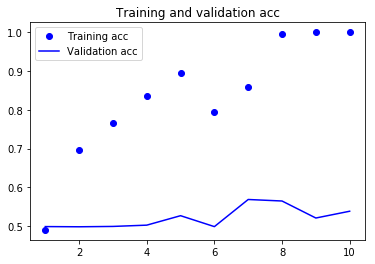

In [54]:
plt.plot(epochs,acc, 'bo',label='Training acc')
plt.plot(epochs,val_acc, 'b',label='Validation acc')
plt.title('Training and validation acc')
plt.legend()
plt.show()

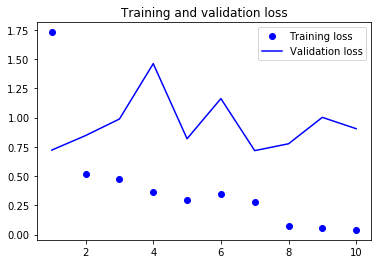

In [55]:
plt.plot(epochs,loss, 'bo',label='Training loss')
plt.plot(epochs,val_loss, 'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [56]:
model.save_weights('pre_trained_glove_model.h5')

In [57]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 0s 2ms/step - loss: 0.6940 - acc: 0.4800 - val_loss: 0.6922 - val_acc: 0.5141
Epoch 2/10
200/200 [==============================] - 0s 1ms/step - loss: 0.5065 - a

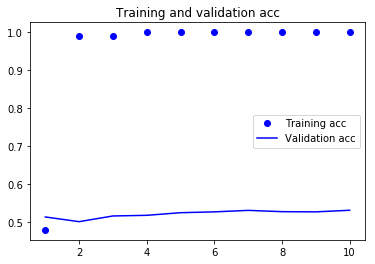

In [58]:
acc =history.history['acc']
val_acc = history.history['val_acc']
loss=history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc, 'bo',label='Training acc')
plt.plot(epochs,val_acc, 'b',label='Validation acc')
plt.title('Training and validation acc')
plt.legend()
plt.show()

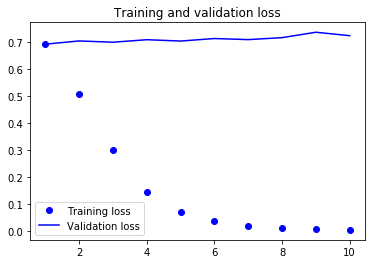

In [59]:
plt.plot(epochs,loss, 'bo',label='Training loss')
plt.plot(epochs,val_loss, 'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [60]:
test_dir = os.path.join(imdb_dir, 'test')

In [62]:
labels=[]
texts=[]

for label_type in ['neg','pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:]=='.txt':
            f=open(os.path.join(dir_name,fname))
            texts.append(f.read())
            f.close()
            if label_type =='neg':
                labels.append(0)
            else:
                labels.append(1)
sequences = tokenizer.texts_to_sequences(texts)
x_test= pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [63]:
model.load_weights('pre_trained_glove_model.h5')

In [64]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 24us/step


[0.9041534555053711, 0.5384]